In the following notebook we're going to learn about clustering using KMeans and AgglomerativeClustering.

Let's start by import the basic libraries for EDA and the iris dataset offered from sklearn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

#remove warnings, run after.
import warnings
# warnings.filterwarnings("ignore")

In [2]:
iris = datasets.load_iris()

In [3]:
# print(iris.data.shape)
# print(iris.target.shape)

(150, 4)
(150,)


In [4]:
X = iris.data[:,2:]
y = iris.target

Create a new dataframe with the information obtained from the datasets in sklearn. 

In [5]:
df = pd.DataFrame()
df["feat0"] = X[:, 0]
df["feat1"] = X[:, 1]
df["class"] = y
df.head()

,feat0,feat1,class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


Data visualization become very useful to better understand the class distribution, as in this case. Moreover gives an idea of how many clusters we might want to crate.

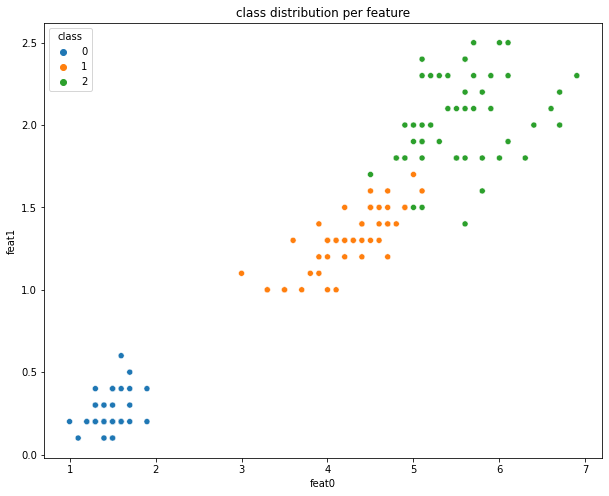

In [6]:
fig, ax = plt.subplots(1,1,figsize = (10,8))
ax.set_title("class distribution per feature")
sns.scatterplot(x = df["feat0"], y = df["feat1"], hue = df["class"], palette = "tab10")
plt.show()

___
To improve the use of KMeans, it's useful to scale(normalize) the values used for the cluster's prediction. From the preprocessing libraries of sklearn we can import MinMaxScaler, to simplify this process.

The normalization process return all the values in a range between 0 and 1. This will make it easier for the algorithm to identify the relationships between the values. 

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X =scaler.fit_transform(X)
# X[:10]

array([[0.06779661, 0.04166667],
       [0.06779661, 0.04166667],
       [0.05084746, 0.04166667],
       [0.08474576, 0.04166667],
       [0.06779661, 0.04166667],
       [0.11864407, 0.125     ],
       [0.06779661, 0.08333333],
       [0.08474576, 0.04166667],
       [0.06779661, 0.04166667],
       [0.08474576, 0.        ]])

Since the data is now ready to be treated, we can import KMeans from sklearn and indicate how many clusters we'd like to create. Once inserted the number the algorithm will assing k random centroids, and by calculating the eucledian distance of the nearby values will group only the ones more related. 

Once fitted the algorithm we can use the labels_ method to indicate the predicted classes for the values.

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 0, 4, 0, 4, 0, 4,
       4, 0, 4, 0, 1, 0, 4, 4, 0, 4, 4, 1, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 1, 3, 3, 4, 1, 1, 3,
       1, 1, 3, 1, 3, 3, 1, 3, 3, 4, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3,
       3, 4, 4, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1])

Now we can through Data Visualization display these predicted labels.

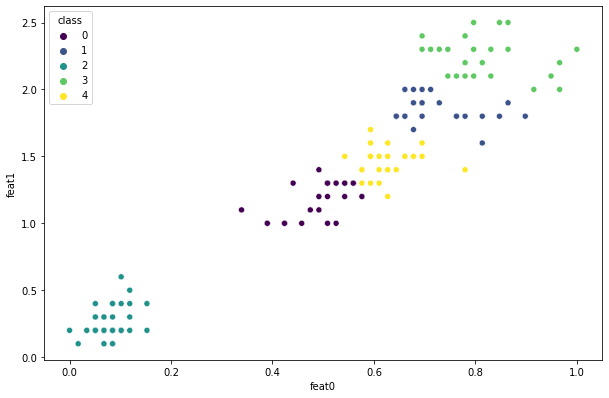

In [9]:
df1 = pd.DataFrame()
df1["feat0"] = X[:,0]
df1["feat1"] = X[:,1]
df1["class"] = kmeans.labels_

fig, ax = plt.subplots(figsize = (10,6.5))
sns.scatterplot(x = df1["feat0"], y = df["feat1"], hue = df1["class"], palette = "viridis")
plt.show()

But how to calculate the "correct" number of groups to predict? 

The elbow method is the most well known method to identify the number of clusters.

In [10]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

C:\Users\Orr\anaconda3\envs\ENVIRONMENT\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


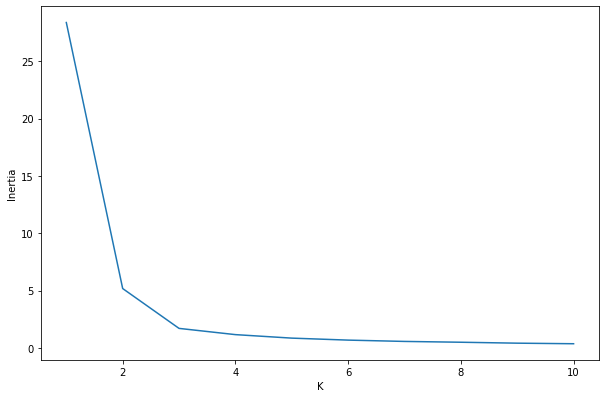

In [11]:
fig, ax = plt.subplots(figsize=(10, 6.5))
sns.lineplot(range(1,11,1), inertia)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")
plt.show()

Given the previous plot we can define the ideal number of Ks for our data, in this case 3.

In [12]:
kmeans = KMeans(n_clusters= 3)
kmeans.fit(X)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
df1["feat0"] = X[:, 0]
df1["feat1"] = X[:, 1]
df1["class"] = y
df1["targets"] = kmeans.labels_
df1

,feat0,feat1,class,targets
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1
...,...,...,...,...
145,0.711864,0.916667,2,0
146,0.677966,0.750000,2,0
147,0.711864,0.791667,2,0
148,0.745763,0.916667,2,0


We can now plot the actual values we used as y, and compare them with the predicted ones:


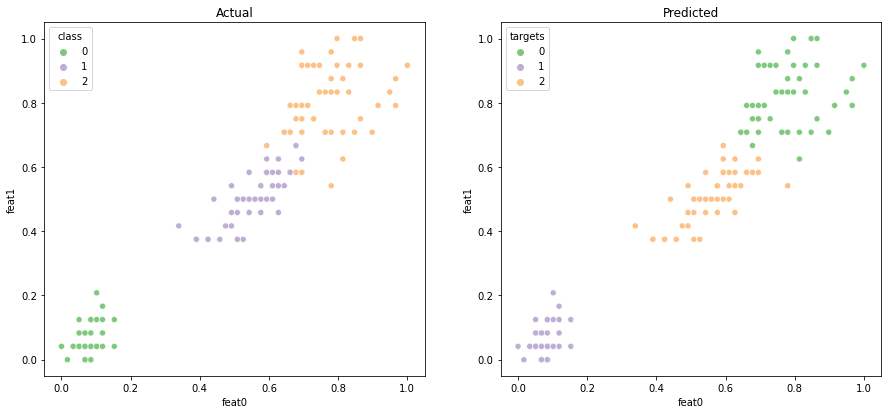

In [14]:
fig, ax = plt.subplots(1,2,figsize = (15,6.5))
ax[0].set_title("Actual")
sns.scatterplot(ax = ax[0], x = df1["feat0"], y = df1["feat1"], hue = df1["class"], palette = "Accent")
ax[1].set_title("Predicted")
sns.scatterplot(ax = ax[1], x = df1["feat0"], y = df1["feat1"], hue = df1["targets"], palette = "Accent")
plt.show()

The predicted groups using The groups predicted using kmeans and the elbow method, once visualized, results to be pretty similar to the classes set at the beginning. Let's try now with a different approach.

___
**AGGLOMERATIVE HIERARCHICAL CLUSTERING** 

This algorithm treat each value as a distinct cluster then, by iterating through the data, it sequentially identifies the 2 closest clusters and merges the most similar. Once again the distance is calculated through the eucledian distance.

The output is represented in a DENDOGRAM which represent the hierarchical relationship between the clusters:

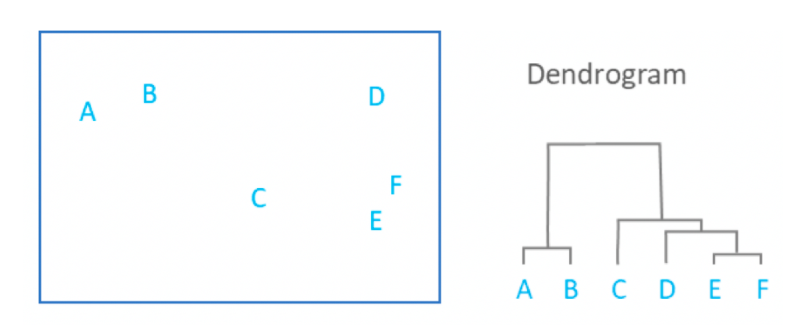

           image from displayr.com
           
While the measure of distance is calculated trough the eucledian distance, the connection we want to have between the cluster is set with the linkage parameter. The linkage can be:

* *simple* for the 2 most similar values, 
* *complete*  for the 2 least similar values,
* *mean*  for the average of the 2 values.
___

We can apply the hierarchical clustering algorithm to the iris dataset as well:

In [15]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target
dfd = pd.DataFrame()
dfd["feat0"]= X[:,0]
dfd["feat1"] = X[:,1]
dfd["class"]=y

Hierarchical clustering can be processed using either raw data or a distance matrix

![raw data vs distance matrix](raw_vs_distance.png)

The library scipy allows to easily create a distance matrix, which returns the matrix of all pair-wise distances. However this process is automatically done by the algorithm.

In [16]:
from scipy.spatial import distance_matrix

dist = distance_matrix(X, X, p = 2)
# dist

Now that we've prepared the data we can import *hierarchy*  from *scipy.cluster* and set the linkage we want to apply. Once done we'll display the DENDROGRAM using the library pylab.

In [17]:
from scipy.cluster import hierarchy

Hc = hierarchy.linkage(dist, "complete")
Ha = hierarchy.linkage(dist, "average")

C:\Users\Orr\anaconda3\envs\ENVIRONMENT\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Orr\anaconda3\envs\ENVIRONMENT\lib\site-packages\ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


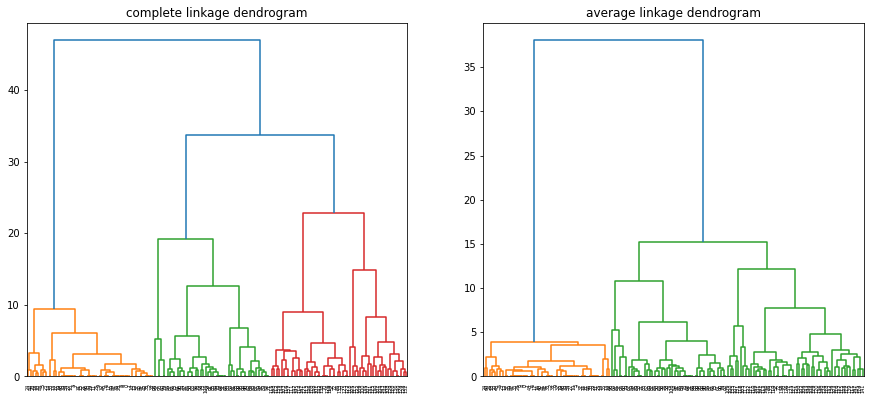

<Figure size 1080x468 with 0 Axes>

In [18]:
import pylab

fig, ax = plt.subplots(1,2, figsize =(15, 6.5))
pylab.figure(figsize = (15,6.5))
ax[0].set_title("complete linkage dendrogram")
dendroC = hierarchy.dendrogram(Hc, ax = ax[0])
ax[1].set_title("average linkage dendrogram")
dendroA = hierarchy.dendrogram(Ha, ax = ax[1])
plt.show()

The Dendrogram above suggests 2 clusters using an *average* linkage, while 3 different groups are suggested using a *complete* linkage. Now that we have an idea of how many groups we want to create, we can use the Agglomerative clustering from sklearn.cluster and apply the number of clusters plus the linkage we'd like to use.

Once chosen the parameters we fit the model and extract the *labels_*  method as we did with the kmeans.

In [19]:
from sklearn.cluster import AgglomerativeClustering

#set number of clusters and type of linkage
agg = AgglomerativeClustering(n_clusters = 3, linkage = "complete")
agg.fit(X)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [20]:
agg.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Add now the predicted results to our initial dataframe and plot them.

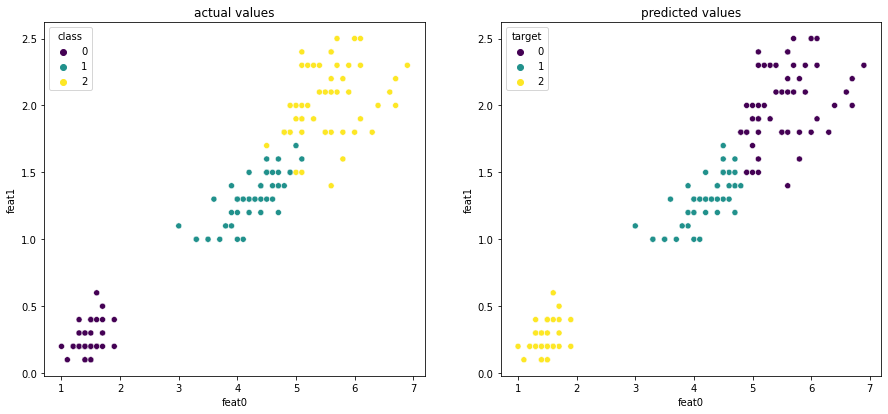

In [21]:
dfd["target"] = agg.labels_

fig, ax = plt.subplots(1,2,figsize = (15,6.5))
ax[0].set_title("actual values")
sns.scatterplot(ax = ax[0], x = dfd["feat0"], y = dfd["feat1"], hue = dfd["class"], palette = "viridis")
ax[1].set_title("predicted values")
sns.scatterplot(ax = ax[1], x = dfd["feat0"], y = dfd["feat1"], hue = dfd["target"], palette = "viridis")
plt.show()

Once again the predicted results are pretty related to the ones we set at the beginning, confirming that the use of clustering help us to identify relationships between data. 

In both cases, after testing our data with Elbow method and Dendrogram, we set the parameter n_clusters to the ideal value of groups we wanted to create. A different approach is used with DBSCAN, which instead automatically identifies the number of clusters to create. 

A new notebook is on its way with a deeper look at this algorithm. 